<a href="https://colab.research.google.com/github/Ahmed-naeem-10/firstgit/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = "2012-01-01"
end = "2024-12-20"
stock = "GOOG"
data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)
#data.set_index("Date", inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981


In [ ]:
ma_200_days = data.Close.rolling(200).mean()
ma_100_days = data.Close.rolling(100).mean()

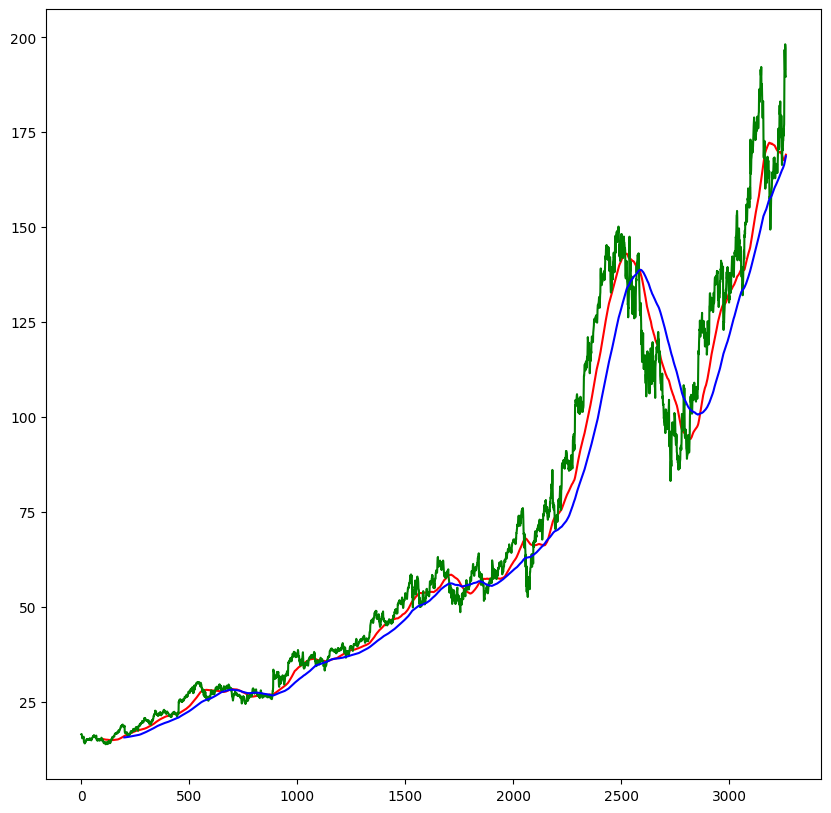

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.plot(ma_200_days, 'b')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [ ]:
data_train.shape[0]

2610

In [ ]:
data_test.shape[0]

653

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,return_sequences=True, activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(units=80,return_sequences=True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 297ms/step - loss: 0.0626
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - loss: 0.0059
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0044
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - loss: 0.0044
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - loss: 0.0046
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 293ms/step - loss: 0.0042
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 297ms/step - loss: 0.0034
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 296ms/step - loss: 0.0032
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0037
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - loss: 0.0031
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - loss: 0.0029
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - loss: 0.0031
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [ ]:
y_pred = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_pred = y_pred*scale

In [ ]:
y = y*scale

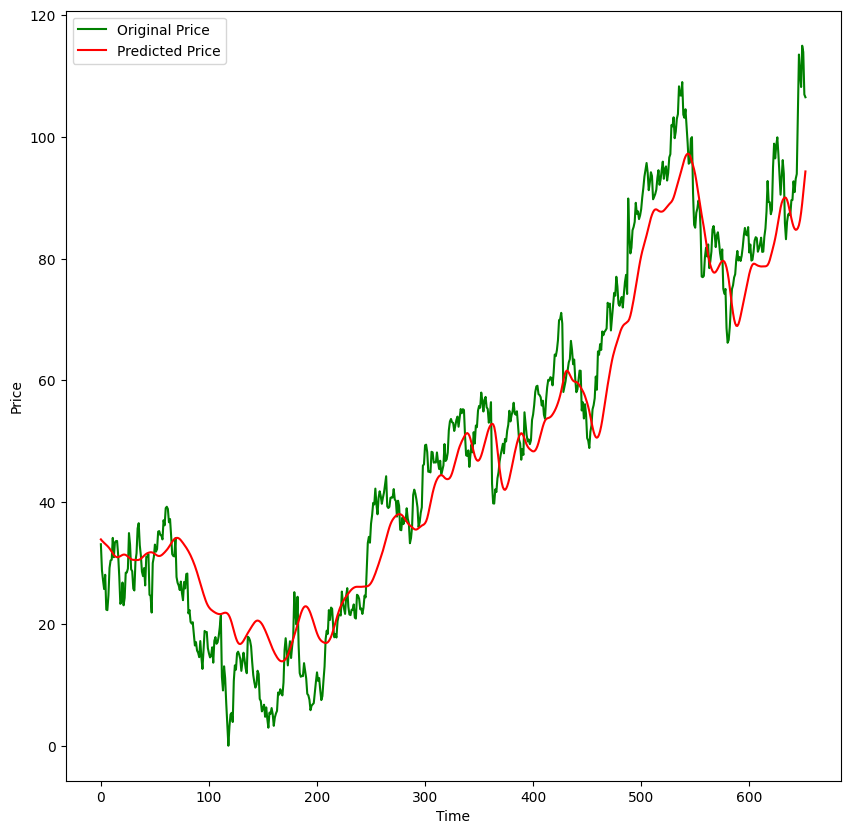

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(y, 'g', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()